# Prueba de evaluación del Aprendizaje Automático
En primer lugar, vamos a generar una semilla para el resto del ejercicio a partir de una cadena de texto, por eso escribiremos en `name` un mensaje único. A partir de esta cadena se generará una semilla.

In [1]:
name = 'Miguel Pérez'
seed = sum(ord(s) for s in name)

Ahora, siempre que sea necesario usar una semilla para generar números aleatorios se usará esta variable.

A continuación, se descativan los warnings porque en la creación de los modelos ajustando los hiperparámetros, al establecer muchas combinaciones puede suceder que alguna de ellas no sea compatible y salten los warning, por lo que para evitar que el resultado pueda quedar lleno de warnings es conveniente ignorarlos.

In [2]:
import warnings
warnings.filterwarnings('ignore')


## 1. Ejercicio de regresión  (1.5 puntos)
Generar un conjunto de datos mediante la función `make_regression` con cien muestras, cinco características, de las cuales solo dos son informativas, un ruido de 1 y utilizando la semilla. Esto es, ejecutar el siguiente código.

In [3]:
from sklearn.datasets import make_regression

x_1, y_1 = make_regression(n_samples=100, n_features=5, n_informative=2, noise=1, random_state=seed)

Sin la necesidad de dividir el conjunto de datos en entrenamiento y test, ni normalizar los datos. Crear un modelo de regresión lineal y Lasso para predecir el valor de `y`. 

Responder a las siguientes preguntas:
1.	Obtener los parámetros ambos modelos.
2.	Obtener el $R^2$ de ambos modelos, ¿cuál es mejor?
3.	En el caso del modelo Lasso ¿qué características son eliminadas? Indicar la posición de estas.

## Solución

Importar librerías necesarias para la resolución del ejercicio

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
import pandas as pd
import numpy as np

Generar el modelo de regresión lineal sin dividir el conjunto de datos en entrenamiento y test, ni normalizar los datos. Para la generación del modelo no se incluye ningún parámetro ya que no se especifica en el enunciado, y es interesante destacar que el parámetro fit_intercept tiene el valor de True por defecto, y será el valor que tome la variable dependiente, "y", cuando las variables independientes sean 0.

In [5]:
model_lr = LinearRegression()
model_lr.fit(x_1, y_1)

coef_lr = model_lr.coef_
intercept_lr = model_lr.intercept_
R2_lr = model_lr.score(x_1,y_1)

Se genera el modelo Lasso nuevamente con el parámetro fit_intercept igual a True por defecto.

In [6]:
model_lasso = Lasso()
model_lasso.fit(x_1, y_1)

intercept_lasso = model_lasso.intercept_
coef_lasso = model_lasso.coef_
R2_lasso = model_lasso.score(x_1, y_1)

Los resultados se muestran en la siguiente tabla. Los coeficientes en ambos casos serán un array de 5 valores, uno por cada característica, que serán identificados por x1, x2, x3, x4, x5, mientras que el intercept será x0.

In [7]:
columns_1 = ['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'R2']
rows_1 = ['Regresión Lineal', 'Lasso']

array_1 = np.array([[intercept_lr, coef_lr[0], coef_lr[1], coef_lr[2], coef_lr[3], coef_lr[4], R2_lr], 
                          [intercept_lasso, coef_lasso[0], coef_lasso[1], coef_lasso[2], coef_lasso[3], 
                           coef_lasso[4], R2_lasso]])

df_1 = pd.DataFrame(data=array_1, index=rows_1, columns=columns_1)
df_1

,x0,x1,x2,x3,x4,x5,R2
Regresión Lineal,0.049708,-0.070253,0.012177,25.097666,0.060767,24.755628,0.999313
Lasso,0.028262,-0.000000,0.000000,24.354952,0.000000,23.875610,0.998244


En la tabla anterior se pueden observar los valores del término independiente y los parámetros de ajuste de la recta en ambos casos, de forma que las ecuaciones (con los parámetros redondeados) quedarían de la siguiente forma. En primer lugar la regresión lineal:

$$y = 0.05 - 0.07 x_1 + 0.01 x_2 + 25.1 x_3 + 0.06 x_4 + 24.76 x_5$$

En el caso Lasso, se observa que hay valores que son iguales a 0 por lo que se omiten de la ecuación:

$$y = 0.03 + 24.35 x_3 + 23.88 x_5$$

Respondiendo a las preguntas:

* Los parámetros han sido obtenidos y se pueden observar tanto en la tabla como en las ecuaciones anteriores.
* El $R^2$ de ambos modelos se puede obtener de la tabla anterior. Se observa que el valor de la regresión lineal es ligeramente superior.
* El modelo Lasso elimina 3 características quedándose con las 2 que son informativas. Estas características eliminadas son las que se corresponden con las columnas 1, 2 y 4 del conjunto de valores x_1 que representa las variables independientes.

## 2. Ejercicio de clasificación  (1.5 puntos)
Generar un conjunto de datos utilizando la función make_classification. En este caso es necesario que el conjunto de datos cuente con doscientos registros, cinco características, dos de las cuales han de ser redundantes y la semilla. Esto es, ejecutar el siguiente código

In [8]:
from sklearn.datasets import make_classification

x_2, y_2 = make_classification(n_samples=200, n_features=5, n_redundant=2, random_state=seed)

Sin la necesidad de dividir el conjunto de datos en entrenamiento y test, ni normalizar los datos. Crear modelos para predecir el resultado de y utilizando una regresión logística, un árbol de decisión y un Random Forest. Tanto el árbol de decisión como Random Forest deben tener una profundidad máxima de 3. 

Responder a las siguientes preguntas:
1. ¿Cuál de los tres modelos tiene una mayor precisión?
2. ¿Cuál de los tres modelos tiene una mayor exactitud?
3. ¿Cuál de los tres modelos tiene una mayor exhaustividad?
4. En el árbol de decisión y Random Forest, ¿se usan todas las características? En caso negativo, cuales son las que no se usan.

## Solución

Importar librerías

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
from IPython.display import Image  
import pandas as pd
import numpy as np
import pydotplus

Generar el modelo de regresión logística. Como no hay necesidad de separar el conjunto de datos en entrenamiento y test, ni normalizar los datos, se puede hacer uso del conjunto de datos generado en el enunciado.

Como el enunciado no especifica ningún parámetro, se mantienen todos los parámetros en su valores por defecto excepto random_state cuyo valor será el de la semilla generada y almacenada en la variable seed.

In [10]:
model_logr = LogisticRegression(random_state = seed)
model_logr.fit(x_2, y_2)
y_2_pred_logr = model_logr.predict(x_2)

Generar el modelo de árbol de decisión. Como no hay necesidad de separar el conjunto de datos en entrenamiento y test, ni normalizar los datos, se puede hacer uso del conjunto de datos generado en el enunciado.

Se mantienen todos parámetros en su valores por defecto, excepto max_depth que se especifica que ha de ser 3, y random_state cuyo valor será el de la semilla generada y almacenada en la variable seed.

In [11]:
model_tree = DecisionTreeClassifier(max_depth = 3, random_state = seed)
model_tree.fit(x_2, y_2)
y_2_pred_tree = model_tree.predict(x_2)

Generar el modelo random forest. Como no hay necesidad de separar el conjunto de datos en entrenamiento y test, ni normalizar los datos, se puede hacer uso del conjunto de datos generado en el enunciado.

Se mantienen todos parámetros en su valores por defecto, excepto max_depth que se especifica que ha de ser 3, y random_state cuyo valor será el de la semilla generada y almacenada en la variable seed.

In [12]:
model_rf = RandomForestClassifier(max_depth = 3, random_state = seed)
model_rf.fit(x_2, y_2)
y_2_pred_rf = model_rf.predict(x_2)

Se generan las métricas para los 3 modelos y se presentan en forma de dataframe.

In [13]:
columns = ['Logistic Regression', 'Decision Tree', 'Random Forest']
rows = ['Precisión', 'Exactitud', 'Exhaustividad']

array_metrics = np.array([[accuracy_score(y_2,y_2_pred_logr), precision_score(y_2,y_2_pred_logr), 
                          recall_score(y_2,y_2_pred_logr)], 
                         [accuracy_score(y_2,y_2_pred_tree), precision_score(y_2,y_2_pred_tree), 
                          recall_score(y_2,y_2_pred_tree)],
                         [accuracy_score(y_2,y_2_pred_rf), precision_score(y_2,y_2_pred_rf), 
                          recall_score(y_2,y_2_pred_rf)]])

df_metrics = pd.DataFrame(data=array_metrics, index=rows, columns=columns)
df_metrics

,Logistic Regression,Decision Tree,Random Forest
Precisión,0.94,0.915888,0.970297
Exactitud,0.95,0.925234,0.980198
Exhaustividad,0.95,0.909910,1.000000


En la tabla anterior se puede encontrar la solución a las 3 primeras preguntas expuestas en el enunciado de forma que el modelo Random Forest es el que tiene un valor superior en las 3 métricas y el Decision Tree el que peor valor tiene.

Para contestar a la última pregunta, se puede comprobar la importancia de las características en el modelo de dos formas, siendo la primera la utilización del atributo feature importance que mide el efecto de cada característica en el modelo, tal que las que tengan un valor igual a 0 será porque han sido desechadas. Otra forma sería pintar el árbol para comprobar qué características se han usado. Se van a comprobar ambas formas comenzando por el árbol de decisión.

In [14]:
# Se comprueban las características
model_tree.feature_importances_

array([0.        , 0.96799097, 0.        , 0.        , 0.03200903])

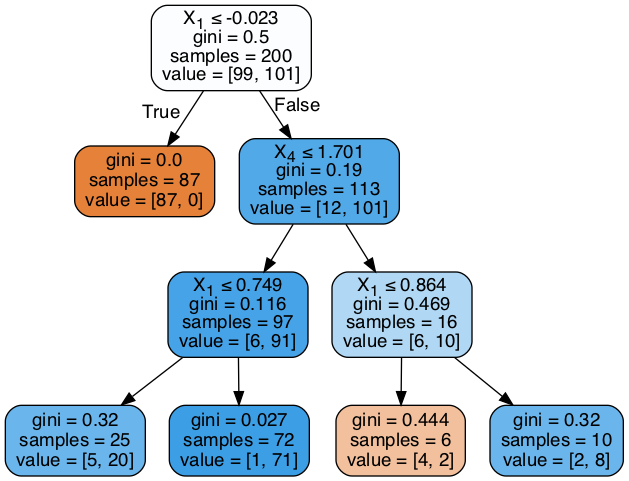

In [15]:
# Se dibuja el árbol
dot_data = StringIO()
export_graphviz(
    model_tree,
    out_file = dot_data,
    filled = True,
    rounded = True,
    special_characters = True
)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

En ambos casos se puede comprobar que solo se hace uso de dos características que se corresponden con la segunda y quinta columna del conjunto de datos.

Para el modelo random forest, como se crean multitud de árboles de decisión que luego se combinan, en concreto 100 que es el valor por defecto de este hiperparámetro, solo se va a dibujar uno de ellos, que será suficiente para contestar a la pregunta.

In [16]:
# Se comprueban las características
model_rf.feature_importances_

array([0.01019972, 0.49193528, 0.24220153, 0.21395473, 0.04170874])

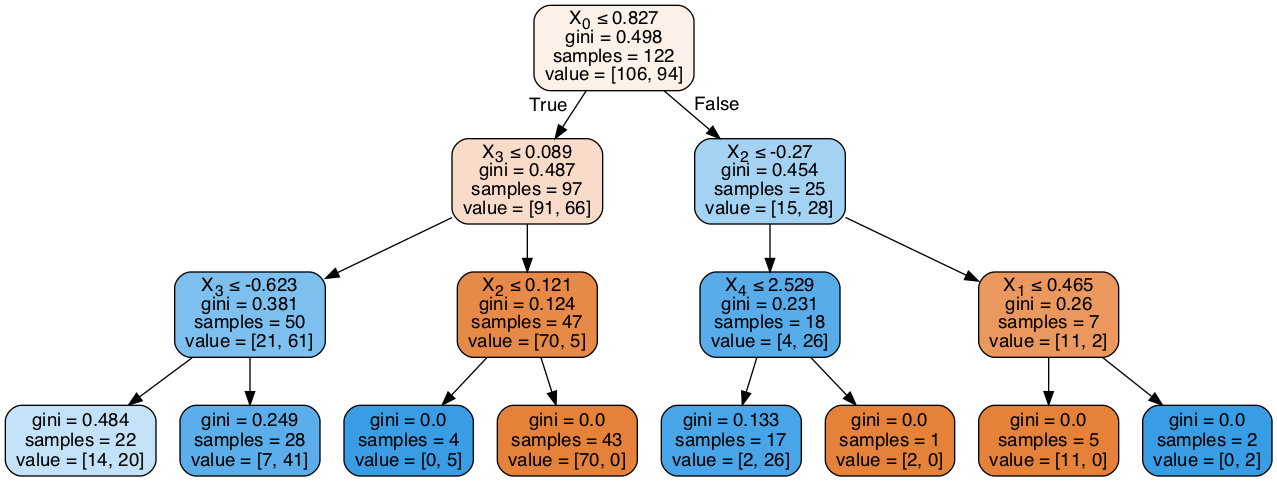

In [17]:
dot_data = StringIO()
export_graphviz(
    model_rf.estimators_[0],
    out_file = dot_data,
    filled = True,
    rounded = True,
    special_characters = True
)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

Se comprueba tanto en la importancia de las características en el modelo como en el dibujo que se hace uso de las 5 columnas que componen el conjunto de datos x_2.

## 3. Ejercicio de clustering  (1 punto)
Utilizar la función `make_blobs` para crear un conjunto de datos de doscientos registros, con siete grupos y nueve características. Seleccionar las tres primeras características del conjunto de datos, es decir, ejecutar el siguiente código.

In [18]:
from sklearn.datasets import make_blobs

x_3, y_3 = make_blobs(n_samples=200, centers=7, n_features=9, random_state=seed)
data = x_3[:, 0:3]

In [19]:
data.shape

(200, 3)

El conjunto de datos en la variable `x` tiene 7 clústeres, pero no así el conjunto en la variable `data` ya que es una proyección en tres dimensiones de un conjunto de datos de nueve dimensiones.  Utilizando el método de la Silhouette obtener el número de clústeres de este conjunto de datos.

Responder a las siguientes preguntas:
1. ¿Cuál es el número de clústeres optimo en el que se pude dividir este subconjunto de datos?

## Solución

Importar las librerías necesarias

In [20]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

Silhouette es una técnica que nos ayuda a calcular el número de clústers óptimo en el que se debe dividir un conjunto de datos. 

Para obtenerlo, se calcula el coeficiente de Silhouette que para una muestra se representa como 

$$ \frac{b - a}{max(a,b)}$$

Siendo:

* a: media de la distancia intracluster.
* b: representa la distancia entre la muestra y el cluster más cercano al que no pertenece.

De esta forma la métrica silhouette_score devuelve la media de los coeficientes de todas las muestras siendo el mejor valor posible 1 y el peor -1.

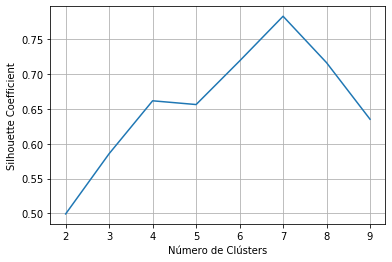

In [21]:
sillhouette_avgs_3 = []

for k in range(2, 10):
    kmean_3 = KMeans(n_clusters = k, random_state=seed).fit(data)
    sillhouette_avgs_3.append(silhouette_score(data, kmean_3.labels_))

fig, ax = plt.subplots()
ax.plot(range(2,10), sillhouette_avgs_3)
ax.set_xlabel('Número de Clústers')
ax.set_ylabel('Silhouette Coefficient')
ax.grid()

Como se ha comentado anteriormente, cuanto mayor sea el coeficiente mejor, por lo que en la gráfica anterior el número de clústers óptimo está representado por el punto máximo que hace un total de 7 clústers.

## 4. Ejercicio de componentes principales (1 punto)
Crear mediante la función `make_regression` un conjunto de datos de cien muestras, y tres características. Esto es ejecutar el siguiente código

In [22]:
from sklearn.datasets import make_regression

x_4, y_4 = make_regression(n_samples=100, n_features=3, random_state=seed)

Sin normalizar los datos, obtener las dos primeras componentes principales. A partir de las dos primeras componentes principales volver a obtener los datos originales.

Responder a las siguientes preguntas:

1. ¿Cuál es porcentaje de varianza que explica la primera, segunda y tercera componente?
2. ¿Cuál es el error cuadrático medio que existe entre los valores originales y los recuperados?

## Solución

Importar librerías

In [23]:
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

A continuación se obtienen las dos primeras componenetes y se usa fit_transform para adaptar el modelo al conjunto de datos y aplicar la reducción de dimensión para posteriormente invertirla. Se imprime a modo de comprobación el tamaño de los 3 conjuntos de datos

In [24]:
pca = PCA(n_components = 2)
x_4_tr = pca.fit_transform(x_4)
x_4_new = pca.inverse_transform(x_4_tr)

print(x_4.shape)
print(x_4_tr.shape)
print(x_4_new.shape)

(100, 3)
(100, 2)
(100, 3)


También se genera el pca para 3 componentes

In [25]:
pca3 = PCA(n_components = 3)
x_4_tr3 = pca3.fit_transform(x_4)

Para contestar a la primera pregunta se genera el ratio de varianza explicada para los dos componentes que se han creado en el modelo, redondeando a tres decimales. 

El ratio de la tercera componente se puede obtener del modelo de 3 componentes, ya que las dos primeras son idénticas para ambos modelos. También se expone mediante un gráfico la variación del porcentaje de varianza explicada según se incrementa el número de componentes.

La primera componente explica el 41.441% de la varianza, la segunda explica el 34.819% y la tercera explica el 23.74%


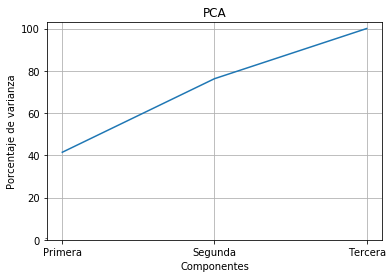

In [26]:
ratio1 = round(pca.explained_variance_ratio_[0]*100,3)
ratio2 = round(pca.explained_variance_ratio_[1]*100,3)
ratio3 = round(pca3.explained_variance_ratio_[2]*100,3)

print("""La primera componente explica el {}% de la varianza, la segunda explica el {}% y la tercera explica el {}%"""
      .format(ratio1, ratio2, ratio3))

fig, ax = plt.subplots()
ax.plot(['Primera', 'Segunda', 'Tercera'], [ratio1, ratio1 + ratio2, ratio1 + ratio2 + ratio3] )
ax.set_xlabel('Componentes')
ax.set_ylabel('Porcentaje de varianza')
ax.set_title('PCA')
ax.set_yticks([0,1], minor = True)
ax.grid()

Se puede observar como la suma de los porcentajes de varianza explicada redondeados a 3 decimales es igual al 100%.

Para contestar la segunda pregunta se hace uso de la función mean_squared_error que permite calcular el error cuadrático medio que existe entre los datos originales y los recuperados.

In [27]:
print('El error cuadrático medio es: {}.'.format(mean_squared_error(x_4, x_4_new)))

El error cuadrático medio es: 0.23810001217638652.


## 5. Solicitudes de acceso a la Universidad (1 punto)
En la hoja “College_Data” hay datos de solicitudes de acceso a diferentes universidades. Los datos de cada columna son:

* University: nombre de la universidad
* Private: indican universidad privada o pública
* Apps: número de aplicaciones recibidas
* Accept: número de solicitudes aceptadas
* Enroll: número de nuevos estudiantes matriculados
* Top10perc: porcentaje de nuevos estudiantes del 10% superior de clase
* Top25perc: porcentaje nuevos estudiantes del 25% superior de H.S. clase
* F.Undergrad: número de estudiantes a tiempo completo
* P.Undergrad: número de estudiantes universitarios a tiempo parcial
* Outstate: fuera del estado
* Room.Board: coste de habitación y comida
* Books: costos estimados de libros
* Personal: gastos personales estimados
* PhD: porcentaje de la facultad con doctorado
* Terminal: porcentaje de facultad con título terminal
* S.F.Ratio: Relación estudiante / facultad
* perc.alumni: porcentaje de exalumnos que donan
* Expend: gastos de la instrucción por alumno
* Grad.Rate: tasa de graduación

Importar los datos, normalizarlo utilizando la normalización estándar y estimar mediante el método de Silhouette el número óptimo de clústeres para este conjunto de datos. Para el número optimo de clústeres obtener la posición de los centroides.

Responder a las siguientes preguntas:
1. ¿Cuál es el número óptimo de clústeres en base a Silhouette?
2. ¿Cuál es el coste de la habitación y comida estimado en cada uno de los clústeres?

## Solución
Lo primero es cargar los datos en Python.

In [28]:
import pandas as pd
df_5 = pd.read_excel('P1_PEC.xlsx', 'College_Data')

Importar librerías necesarias.

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

Comprobar la forma de los datos.

In [30]:
# Observar el contenido
df_5.head(5)

,University,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [31]:
# Comprobar el tamaño
print(df_5.shape)
print(len(df_5.University.unique()))

(777, 19)
777


In [32]:
# Modificar columna university como índice de fila
df_5.set_index('University', inplace = True)

Como la variable Private es categórica binaria, y para el cálculo del número óptimo de clusters mediante el método Silhouette es necesario generar el algoritmo K-means, que no trabaja con variables categóricas, se decide eliminar dicha variable.

In [33]:
df_5.drop('Private', axis = 1, inplace = True)

In [34]:
# Comprobar que no hay valores nulos
print(df_5.isna().sum())

Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64


In [35]:
# Comprobar el tipo de las variables
df_5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Apps         777 non-null    int64  
 1   Accept       777 non-null    int64  
 2   Enroll       777 non-null    int64  
 3   Top10perc    777 non-null    int64  
 4   Top25perc    777 non-null    int64  
 5   F.Undergrad  777 non-null    int64  
 6   P.Undergrad  777 non-null    int64  
 7   Outstate     777 non-null    int64  
 8   Room.Board   777 non-null    int64  
 9   Books        777 non-null    int64  
 10  Personal     777 non-null    int64  
 11  PhD          777 non-null    int64  
 12  Terminal     777 non-null    int64  
 13  S.F.Ratio    777 non-null    float64
 14  perc.alumni  777 non-null    int64  
 15  Expend       777 non-null    int64  
 16  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(16)
memory usage: 109.3+

In [36]:
# Conjunto de datos final
df_5.head(5)

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
University,,,,,,,,,,,,,,,,,
Abilene Christian University,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


Normalizar los datos utilizando la normalización estándar, cuya fórmula es la siguiente:

$$ x_{sd} = \frac{X - \mu}{\sigma}  $$

Para ello se hará uso de la función StandardScaler.

In [37]:
scaler = StandardScaler()
df_5_scaled = scaler.fit_transform(np.array(df_5).astype(float))

Obtener el número óptimo de clúster mediante el metodo silhouette que ya ha sido explicado en el ejercicio 3.

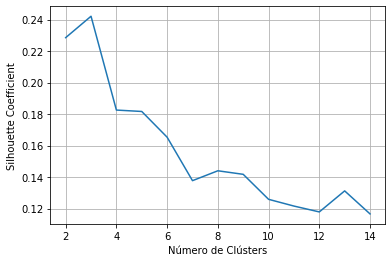

In [38]:
silhouette_avgs_5 = []

for k in range(2, 15):
    kmean_5 = KMeans(n_clusters = k, random_state=seed).fit(df_5_scaled)
    silhouette_avgs_5.append(silhouette_score(df_5_scaled, kmean_5.labels_))

fig, ax = plt.subplots()
ax.plot(range(2,15), silhouette_avgs_5)
ax.set_xlabel('Número de Clústers')
ax.set_ylabel('Silhouette Coefficient')
ax.grid()

Se observa claramente que el número óptimo de cluster es 3.

Para obtener los centroides, se genera el modelo con el número óptimo de clústers y se muestran a continuación.

In [39]:
model_kmeans_5 = KMeans(n_clusters=3, random_state=seed).fit(df_5_scaled)

In [40]:
centroides = model_kmeans_5.cluster_centers_
print('El primer centroide es: {}\n'.format(centroides[0]))
print('El segundo centroide es: {}\n'.format(centroides[1]))
print('El tercer centroide es: {}'.format(centroides[2]))

El primer centroide es: [-0.37121158 -0.36101357 -0.33696673 -0.5295144  -0.55519495 -0.31185023
 -0.12785759 -0.47491443 -0.3670614  -0.10248925  0.03788793 -0.56081008
 -0.55751843  0.23271392 -0.33255606 -0.44007987 -0.354028  ]

El segundo centroide es: [ 1.8406535   2.0087858   2.20390747  0.22998143  0.39926533  2.26775172
  1.57976036 -0.53724098 -0.16966     0.3264646   0.81215031  0.69032634
  0.67868889  0.5848428  -0.59493273 -0.05853333 -0.363977  ]

El tercer centroide es: [-0.03491912 -0.11663877 -0.23321938  0.85584974  0.83757607 -0.30207524
 -0.36957759  1.04868266  0.71768809  0.05906132 -0.37449144  0.73753847
  0.73607726 -0.6354434   0.8170256   0.80568529  0.76794361]


Para obtener el coste de comida y habitación estimado en cada uno de los clusters, es necesario separar el conjunto de datos según el clúster al que pertenezca, y realizar la media de la característica Room.Board

In [41]:
df_5['clusters'] = model_kmeans_5.labels_

In [42]:
mean_room_board_cluster0 = round(df_5[df_5['clusters']==0]['Room.Board'].mean(),2)
mean_room_board_cluster1 = round(df_5[df_5['clusters']==1]['Room.Board'].mean(),2)
mean_room_board_cluster2 = round(df_5[df_5['clusters']==2]['Room.Board'].mean(),2)


print('El coste medio de comida y habitación en el cluster 0 es: {}'.format(mean_room_board_cluster0))
print('El coste medio de comida y habitación en el cluster 1 es: {}'.format(mean_room_board_cluster1))
print('El coste medio de comida y habitación en el cluster 2 es: {}'.format(mean_room_board_cluster2))

El coste medio de comida y habitación en el cluster 0 es: 3955.23
El coste medio de comida y habitación en el cluster 1 es: 4171.58
El coste medio de comida y habitación en el cluster 2 es: 5144.11


## 6. Ionosfera (2 puntos)
En la hoja “Ionosphere” hay datos de la ionosfera. Las 34 primeras columnas son valores numéricos y la última es una etiqueta de texto con ‘g’ cuando el resultado es bueno y ‘b’ cuando es malo. Importar los datos y obtener el mejor de los siguientes modelos:

* regresión logística
* máquinas de vector soporte con kernel: linear, poly, rbf o sigmoid
* k-nn con entre 1 y 15 vecinos
* Radius Neighbors con radio 10, 15, 20 y 25

Para la creación de los modelos no es necesario normalizar los datos. Comprobar si existe multicolinealidad en el conjunto de datos y, en el caso de que sea así, eliminar las características redundantes.

Los datos se han de dividir en un conjunto de entrenamiento que contenga el 65% de los datos y el resto para test.

Responder a las siguientes preguntas:
1.	¿Cuál es el mejor modelo en cada una de las familias?
2.	¿Cual es el mejor modelo de todas las familias?

## Solución
Como siempre el primer paso es importar los datos y visualizarlos.

In [43]:
import pandas as pd
pd.set_option('display.max_columns', 50)
df_6 = pd.read_excel('P1_PEC.xlsx', 'Ionosphere')

Importar librerías.

In [44]:
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

Tratamiento de datos.

In [45]:
# Comprobar dataframe
df_6.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,-0.67743,0.34432,-0.69707,-0.51685,-0.97515,0.05499,-0.62237,0.33109,-1.00000,-0.13151,-0.45300,-0.18056,-0.35734,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,0.05346,0.85443,0.00827,0.54591,0.00299,0.83775,-0.13644,0.75535,-0.08540,0.70887,-0.27502,0.43385,-0.12062,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,0.14516,0.54094,-0.39330,-1.00000,-0.54467,-0.69975,1.00000,0.00000,0.00000,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,-0.20275,0.56409,-0.00712,0.34395,-0.27457,0.52940,-0.21780,0.45107,-0.17813,0.05982,-0.35575,0.02309,-0.52879,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


In [46]:
# Comproabar tipo de las columnas
df_6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 35 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       351 non-null    int64  
 1   1       351 non-null    int64  
 2   2       351 non-null    float64
 3   3       351 non-null    float64
 4   4       351 non-null    float64
 5   5       351 non-null    float64
 6   6       351 non-null    float64
 7   7       351 non-null    float64
 8   8       351 non-null    float64
 9   9       351 non-null    float64
 10  10      351 non-null    float64
 11  11      351 non-null    float64
 12  12      351 non-null    float64
 13  13      351 non-null    float64
 14  14      351 non-null    float64
 15  15      351 non-null    float64
 16  16      351 non-null    float64
 17  17      351 non-null    float64
 18  18      351 non-null    float64
 19  19      351 non-null    float64
 20  20      351 non-null    float64
 21  21      351 non-null    float64
 22  22

In [47]:
# Modificar el tipo de dato de los nombres de las columnas
df_6.columns = df_6.columns.astype(str)

In [48]:
# Comprobar tamaño
df_6.shape

(351, 35)

In [49]:
# Comprobar estadísticas de las variables
df_6.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33
count,351.000000,351.0,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000
mean,0.891738,0.0,0.641342,0.044372,0.601068,0.115889,0.550095,0.119360,0.511848,0.181345,0.476183,0.155040,0.400801,0.093414,0.344159,0.071132,0.381949,-0.003617,0.359390,-0.024025,0.336695,0.008296,0.362475,-0.057406,0.396135,-0.071187,0.541641,-0.069538,0.378445,-0.027907,0.352514,-0.003794,0.349364,0.014480
std,0.311155,0.0,0.497708,0.441435,0.519862,0.460810,0.492654,0.520750,0.507066,0.483851,0.563496,0.494817,0.622186,0.494873,0.652828,0.458371,0.618020,0.496762,0.626267,0.519076,0.609828,0.518166,0.603767,0.527456,0.578451,0.508495,0.516205,0.550025,0.575886,0.507974,0.571483,0.513574,0.522663,0.468337
min,0.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1.000000,0.0,0.472135,-0.064735,0.412660,-0.024795,0.211310,-0.054840,0.087110,-0.048075,0.021120,-0.065265,0.000000,-0.073725,0.000000,-0.081705,0.000000,-0.225690,0.000000,-0.234670,0.000000,-0.243870,0.000000,-0.366885,0.000000,-0.332390,0.286435,-0.443165,0.000000,-0.236885,0.000000,-0.242595,0.000000,-0.165350
50%,1.000000,0.0,0.871110,0.016310,0.809200,0.022800,0.728730,0.014710,0.684210,0.018290,0.667980,0.028250,0.644070,0.030270,0.601940,0.000000,0.590910,0.000000,0.576190,0.000000,0.499090,0.000000,0.531760,0.000000,0.553890,-0.015050,0.708240,-0.017690,0.496640,0.000000,0.442770,0.000000,0.409560,0.000000
75%,1.000000,0.0,1.000000,0.194185,1.000000,0.334655,0.969240,0.445675,0.953240,0.534195,0.957895,0.482375,0.955505,0.374860,0.919330,0.308975,0.935705,0.195285,0.899265,0.134370,0.894865,0.188760,0.911235,0.164630,0.905240,0.156765,0.999945,0.153535,0.883465,0.154075,0.857620,0.200120,0.813765,0.171660
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Se observa que la variable 1 son todo valores 0 por lo que no aporta ningún valor y se elimina

In [50]:
df_6.drop('1', axis = 1, inplace = True)

In [51]:
# Comprobar valores nulos
print(df_6.isna().sum())

0     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
dtype: int64


In [52]:
# Mapear los valores de la variable dependiente de forma que el resultado bueno es 1 y el malo es 0
gb_dict = {'g':1, 'b':0}
df_6['34'] = df_6['34'].map(gb_dict)

La existencia de multicolinealidad, que consiste en poder explicar una característica independiente mediante una combinación lineal del resto, entre las características que se van a utilizar para los modelos puede ser problemático, y una de las técnicas para identificar este problema es el VIF.

El valor de VIF se calcula sobre las variables independientes por lo que para este cálculo se eliminará la variable 34 que es la dependiente. Posteriormente, se calculará el valor que sigue la siguiente fórmula:

$$VIF_i = \frac{1}{1 - R_i^2}$$

Para su cálculo se hará uso de una función que se generará a continuación. El valor del VIF se encuentra acotado entre 1 (no existe multicolinealidad) e infinito (existe una multicolinealidad perfecta). Es habitual eliminar las características con un valor por encima de 5 y aunque este criterio se puede relajar, es el que se va a llevar a cabo a continuación. También hay que destacar que tras el primer cálculo de los valores de vif, se elimina la característica con un valor máximo superior a 5, y se vuelven a calcular los valores de vif y así sucesivamente hasta que no haya ningún valor superior a 5.

In [53]:
def VIF(df):
    """
    param: dataframe que contiene las variables para calcular el VIF
    return: dataframe con los valores de VIF
    """
    
    # Almacenar los valores de las columnas
    features = list(df.columns)
    num_features = len(features)
    
    # Generar el modelo de regresión lineal
    model = LinearRegression()
    
    # Crear el dataframe para almacenar los valores VIF
    vif_df = pd.DataFrame(index = ['VIF'], columns = features)
    vif_df = vif_df.fillna(0)
    
    # Generar valores VIF y almacenarlos en el dataframe
    for i in range(num_features):
        x_features = features[:]
        y_feature = features[i]
        x_features.remove(y_feature)
        
        x = df[x_features]
        y = df[y_feature]
        
        model.fit(df[x_features], df[y_feature])
        
        vif_df[y_feature] = 1/(1 - model.score(df[x_features], df[y_feature]))
    
    return vif_df

In [54]:
# Establecer variable a borrar
variable_borrar = '34'

# Crear copia del dataframe
df_6_vif = df_6.copy()

# Establecer valor límite de vif
vif_max = 5

# Crear listas para almacenar valores
lista_vif_max = []
lista_feature_vif_max = []

# Almacenar variables
features = list(df_6_vif.columns)

while vif_max >= 5:
    
    # Borrar variable con mayor vif. En la primera iteración se borrará la variable dependiente
    features.remove(variable_borrar)
    
    # Crear el dataframe sin la variable eliminada
    df_6_vif = df_6_vif[features]
    
    # Generar los valores VIF a través de la función creada en la celda anterior
    vif_data = VIF(df_6_vif)
    
    # Almacenar valor mayor de VIF y su variable
    variable_borrar = vif_data.transpose().idxmax()[0]
    vif_max = round(vif_data.transpose().max()[0],4)
    
    # Añadir los valores a las listas
    lista_vif_max.append(vif_max)
    lista_feature_vif_max.append(variable_borrar)
    

In [55]:
vif_data = np.array([lista_feature_vif_max, lista_vif_max])
vif = pd.DataFrame(data = vif_data.T, columns = ['feature', 'vif'])
vif

,feature,vif
0,14,7.1097
1,20,5.9591
2,16,4.7621


Se comprueba en la tabla anterior que las características a eliminar son 14 y 20. Por lo tanto, se procede a su eliminación del dataset df_6 para continuar con la creación de los modelos una vez la multicolinealidad ya ha sido analizada.

In [56]:
df_6.drop(['14', '20'], axis = 1, inplace = True)
df_6.head(5)

,0,2,3,4,5,6,7,8,9,10,11,12,13,15,16,17,18,19,21,22,23,24,25,26,27,28,29,30,31,32,33,34
0,1,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,-0.17755,0.59755,-0.44945,-0.38223,0.84356,-0.38542,0.58212,-0.32192,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,1
1,1,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,-0.67743,0.34432,-0.69707,-0.97515,0.05499,-0.62237,0.33109,-1.00000,-0.45300,-0.18056,-0.35734,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,0
2,1,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,0.05346,0.85443,0.00827,0.00299,0.83775,-0.13644,0.75535,-0.08540,-0.27502,0.43385,-0.12062,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,1
3,1,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.14516,0.54094,-0.39330,-1.00000,-0.54467,1.00000,0.00000,0.00000,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,0
4,1,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,-0.20275,0.56409,-0.00712,-0.27457,0.52940,-0.21780,0.45107,-0.17813,-0.35575,0.02309,-0.52879,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,1


El dataset ya está listo para comenzar a crear los modelos. Se ha de dividir en los conjuntos de entrenamiento y test según especifica el enunciado y se puede generar los modelos.

In [57]:
# Obtener los conjuntos de entrenamiento y test
y_6 = df_6['34'].values
X_6 = df_6.drop('34', axis = 1).values

X_train_6, X_test_6, y_train_6, y_test_6 = train_test_split(X_6, y_6, test_size = 0.35)

Durante la creación de los modelos, se van a comprobar muchas combinaciones entre los hiperparámetros que se especifican en el enunciado. Para poder comprobar cuál tiene un mejor rendimiento se ha de usar siempre un mismo tipo de scoring que será el F1 score que es una métrica que se calcula a partir de la exhaustividad y de la la exactitud tal que:

$$F1_{score} = \frac{2*precision*recall}{precision+recall}$$

A continuación se van a evaluar los modelos. Para ello, se van a generar tres funciones:

* models_and_parameters_definition: definir los parámetros y modelos en gridsearch.
* select_best_model: elegir los mejores modelos por familia.
* train_test_score: obtener scoring de training y test.

Se van a evaluar: 

* Regresión Logística, en la que no se especifica en el enunciado la necesidad de incluir ningún parámetro, aunque se ha decidido tener en cuenta el parámetro C para considerar su influencia en el modelo. El parámetro C es el inverso de la regularización, por lo que valores bajos indican alta regularización.

* Máquinas de vector soporte, en el cual se especifica un parámetro a evaluar, por lo que evaluará dicho parámetro y otro que se considera interesante. Los parámetros son el kernel, que especifica el tipo de kernel que usará el algoritmo, y C, parámetro de regularización, inversamente proporcional a la misma.

* K-NN, para el cuál, el enunciado especifica el número de vecinos a comprobar, y de forma adicional también se incluirá la función de distancia.

* Radius Neighbors, similar al anterior, especificando en este caso el radio a usar como hiperparámetro, y de nuevo se incluye la métrica a usar para calcular la distancia. También se incluye el hiperparámeto outlier_label, que se encarga del tratamiento de los outliers, asignándolo a uno de los cluster.

Para la elección del mejor modelo de cada familia, se va a usar el atributo de la función grid search denominado best_score. Dicho atributo recoge la media de la validación cruzada con el mejor estimador de cada familia. Como se ha especificado, la métrica a considerar como el mejor scoring será F1 debido a que tiene en cuenta tanto la exactitud como la exhaustividad.

In [58]:
def models_and_parameters_definition():
    """
    Función para definir los modelos y parámetros que se quieren comprobar.
    :return: diccionario con los gridsearch preparados
    """
    
    # Regresión Logística
    params_lr = {'C': np.arange(0.5,10, 0.5)}
    model_logr_6 = LogisticRegression(random_state=seed)
    gs_lr = GridSearchCV(estimator=model_logr_6,
                        param_grid=params_lr,
                        cv = 10,
                        scoring = 'f1')
    
    # Máquinas de Vector Soporte
    params_svc = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                'C': np.arange(0.5, 10, 0.5)}
    model_svc = SVC(random_state=seed)
    gs_svc = GridSearchCV(estimator=model_svc,
                        param_grid=params_svc,
                        cv = 10,
                        scoring = 'f1')

    # KNN
    params_knn = {'n_neighbors': np.arange(1,16),
                  'metric': ['minkowski', 'manhattan', 'euclidean', 'seuclidean']}
    model_knn = KNeighborsClassifier()
    gs_knn = GridSearchCV(estimator=model_knn,
                        param_grid=params_knn,
                        cv = 10,
                        scoring = 'f1')
    
    # Radius Neighbors
    params_rn = {'radius': [10, 15, 20, 25],
                'metric': ['minkowski', 'manhattan', 'euclidean', 'seuclidean'],
                'outlier_label': ['most_frequent', 0, 1]}
    model_rn = RadiusNeighborsClassifier()
    gs_rn = GridSearchCV(estimator=model_rn,
                        param_grid=params_rn,
                        cv = 10,
                        scoring = 'f1')

    grid_search_models = {"gs_lr": gs_lr,
                          "gs_svc": gs_svc,
                          "gs_knn": gs_knn,
                          "gs_rn": gs_rn}
    
    return grid_search_models

In [59]:
def select_best_model(grid_search_models, X_train_6, y_train_6):
    """
    Función para elegir el mejor modelo de cada familia con los mejores parámetros
    :param grid_search_models: diccionario con todos los gridSearch a ehecutar.
    :param X_train: conjunto de datos con las variables independientes.
    :param y_train: conjunto de datos con la variable dependiente.
    :return: df con los resultados, mejor modelo lr, mejor modelo svc, mejor modelo knn, mejor modelo rn
    """
    # Entrenar los gridsearch
    for nombre, grid_search in grid_search_models.items():
        print("Haciendo Grid Search de %s..." % nombre)
        grid_search.fit(X_train_6, y_train_6)

    # Obtener datos de los mejores modelos por familia
    mejor_score = [(nombre_modelo, grid_search.best_score_, grid_search.best_params_,
                                       str(grid_search.best_estimator_))
                                      for nombre_modelo, grid_search in grid_search_models.items()]
    mejor_score_df = pd.DataFrame(mejor_score, columns=["gridSearchCV", 
                                                                           "best_score", 
                                                                           "best_params", 
                                                                           "best_estimator"])
    # Obtener los gr con los mejores modelos
    best_model_lr = grid_search_models.get("gs_lr")
    best_model_svc = grid_search_models.get("gs_svc")
    best_model_knn = grid_search_models.get("gs_knn")
    best_model_rn = grid_search_models.get("gs_rn")
    
    return mejor_score_df, best_model_lr, best_model_svc, best_model_knn, best_model_rn

In [60]:
def train_test_score(models, X_train_6, X_test_6, y_train_6, y_test_6):
    """
    Función para calcular los F1 score de los modelos generados.
    :param models: lista con el mejor modelo de cada familia.
    :param X_train_6: conjunto de las variables independientes de entrenamiento del dataset.
    :param y_train_6: conjunto de las variables dependientes de entrenamiento del dataset.
    :param X_test_6: conjunto de las variables independientes de test del dataset.
    :param y_test_6: conjunto de las variables dependientes de test del dataset.
    :return: dataframe que recoge los scoring
    """
    
    # Listas para almacenar los scoring
    score_train = []
    score_test = []
    
    # Valores para las columnas y filas
    columns_scoring = ['Score Training', 'Score Test']
    rows_scoring = ['Regresión Logística', 'SVC', 'KNN', 'Radius Neighbors']
    
    # Generar scorings para cada modelo
    for i in models:
        score_train.append(i.score(X_train_6, y_train_6))
        score_test.append(i.score(X_test_6, y_test_6))
        
    # Generar dataframe con los scoring
    score_df = pd.DataFrame(data = np.array([score_train, score_test]).transpose(), 
                            columns = columns_scoring, index = rows_scoring)
    return score_df

In [61]:
# Ejecutar las funciones para generar los mejores modelos
grid_search_models = models_and_parameters_definition()
best_models, best_model_lr, best_model_svc, best_model_knn, best_model_rn  = select_best_model(grid_search_models, 
                                                                                               X_train_6, y_train_6)
best_models

Haciendo Grid Search de gs_lr...
Haciendo Grid Search de gs_svc...
Haciendo Grid Search de gs_knn...
Haciendo Grid Search de gs_rn...


,gridSearchCV,best_score,best_params,best_estimator
0,gs_lr,0.900033,{'C': 4.0},"LogisticRegression(C=4.0, class_weight=None, d..."
1,gs_svc,0.973707,"{'C': 8.5, 'kernel': 'rbf'}","SVC(C=8.5, break_ties=False, cache_size=200, c..."
2,gs_knn,0.954770,"{'metric': 'manhattan', 'n_neighbors': 2}","KNeighborsClassifier(algorithm='auto', leaf_si..."
3,gs_rn,0.947834,"{'metric': 'manhattan', 'outlier_label': 0, 'r...","RadiusNeighborsClassifier(algorithm='auto', le..."


La tabla anterior, obtenida del dataframe best models, recoge el mejor modelo de cada familia obtenido gracias a la función grid search. A continuación se imprimen los resultados de los parámetros

In [62]:
print("""El mejor modelo de regresión logística resulta con el hiperparámetros C igual a {}.\n"""
      .format(best_models['best_params'][0]['C']))

print("""El mejor modelo de máquinas de vector soporte resulta de el kernel igual a {} y el hiperparámetros C igual a 
{}.\n""".format(best_models['best_params'][1]['kernel'], best_models['best_params'][1]['C']))

print("""El mejor modelo de k-nn resulta de el número de vecinos igual a {} y la función de distancia {}.\n"""
      .format(best_models['best_params'][2]['n_neighbors'], best_models['best_params'][2]['metric']))

print("""El mejor modelo de Radius Neighbors resulta de el radio igual a {}, la función de distancia {} 
y asignando los outliers al cluster {}."""
      .format(best_models['best_params'][3]['radius'], best_models['best_params'][3]['metric'], 
              best_models['best_params'][3]['outlier_label']))

El mejor modelo de regresión logística resulta con el hiperparámetros C igual a 4.0.

El mejor modelo de máquinas de vector soporte resulta de el kernel igual a rbf y el hiperparámetros C igual a 
8.5.

El mejor modelo de k-nn resulta de el número de vecinos igual a 2 y la función de distancia manhattan.

El mejor modelo de Radius Neighbors resulta de el radio igual a 10, la función de distancia manhattan 
y asignando los outliers al cluster 0.


Para escoger el mejor modelo de todas las familias se van a obtener los scoring F1 del mejor modelo de cada familia tanto para el set de datos de entrenamiento como para el de test.

In [63]:
# Ejercutar función para obtener los scoring
models = [best_model_lr, best_model_svc, best_model_knn, best_model_rn]
score_df = train_test_score(models, X_train_6, X_test_6, y_train_6, y_test_6)
score_df

,Score Training,Score Test
Regresión Logística,0.949153,0.905882
SVC,0.993056,0.945455
KNN,0.985915,0.927711
Radius Neighbors,0.949833,0.935673


Se puede comprobar a partir de la tabla anterior que todos tienen valores superiores para la parte de entrenamiento que para la de test, pero en ambos casos el mejor modelo es el de máquinas de vector soporte. Aunque se hayan obtenido los dos scoring, el que realmente muestra el rendimiento del modelo es el de la parte de test, ya que son datos que el modelo no ha visto y que está prediciendo totalmente.

## 7: Predicción de la miopía en una población (2 puntos)
El archivo myopia.csv contiene los datos de un estudio realizado durante 5 años en los que se siguió la salud ocular de una población. Los registros se corresponden con los valores tomados inicialmente estudio y una variable "MYOPIC" en la que registra si al sujeto se le diagnostico miopía durante el estudio. Las variables son:
* ID: Identificador ID
* STUDYYEAR: Año en los que se inició el estudio
* MYOPIC: Desarrollo miopía dentro de los primeros cinco años
* AGE: Edad a primera visita
* GENDER: Genero
* SPHEQ: Refracción esférica equivalente
* AL: Longitud Axial
* ACD: Profundidad de cámara anterior
* LT: Grosor de la lente
* VCD: Profundidad de cámara vítrea
* SPORTHR: ¿Cuántas horas por semana fuera de la escuela el niño participó en deportes o actividades al aire libre?
* READHR: ¿Cuántas horas por semana fuera de la escuela el niño pasó leyendo por placer?
* COMPHR: ¿Cuántas horas por semana fuera de la escuela el niño pasó jugando a video juegos de ordenador o trabajando en el ordenador?
* STUDYHR: ¿Cuántas horas por semana fuera de escuela el niño pasa leyendo o estudiando para tareas escolares?
* TVHR: ¿Cuántas horas por semana fuera de la escuela el niño pasó mirando televisión?
* DIOPTERHR: Compendio de horas de actividades de trabajo cercano que se define como: DIOPTERHR = 3 * (READHR + STUDYHR) + 2 * COMPHR + TVHR
* MOMMY: ¿La madre del sujeto es miope?
* DADMY: ¿El padre del sujeto es miope?

Crear un modelo utilizando regresión logística que pueda predecir la aparición de miopía en el conjunto de estudio. Para ello eliminar las características que no son significativas y las colineales en caso de existir.

Responder a las siguientes preguntas:
1. ¿Cuál es la precisión, exactitud y exhaustividad en entrenamiento y test?
2. ¿Por qué se producen estos resultados?

## Solución

Comenzar importando los datos.

In [64]:
import pandas as pd

df_7 = pd.read_excel('P1_PEC.xlsx', 'Myopia')

Importar librerías

In [65]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline 
import matplotlib.pyplot as plt
from seaborn import heatmap
import numpy as np

Tratamiento de datos

In [66]:
df_7.head()

,ID,STUDYYEAR,MYOPIC,AGE,GENDER,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,1,1992,1,6,1,-0.052,21.89,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,2,1995,0,6,1,0.608,22.38,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,3,1991,0,6,1,1.179,22.49,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,4,1990,1,6,1,0.525,22.20,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,1995,0,5,0,0.697,23.29,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [67]:
df_7.shape

(618, 18)

In [68]:
# Establecer columna ID con índice de fila ya que no aporta nada al modelo
df_7.set_index('ID', inplace= True)

In [69]:
# Estadísticas básicas de las variables
df_7.describe()

,STUDYYEAR,MYOPIC,AGE,GENDER,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
count,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000
mean,1992.359223,0.131068,6.299353,0.488673,0.801010,22.496780,3.578629,3.541453,15.376780,11.953074,2.796117,2.105178,1.490291,8.948220,26.017799,0.506472,0.498382
std,1.734507,0.337748,0.712950,0.500277,0.625918,0.680141,0.230394,0.154519,0.664183,7.968296,3.068191,3.056508,2.216207,5.719021,16.031715,0.500363,0.500402
min,1990.000000,0.000000,5.000000,0.000000,-0.699000,19.900000,2.772000,2.960000,13.380000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,1991.000000,0.000000,6.000000,0.000000,0.456250,22.040000,3.424000,3.436000,14.930000,6.000000,0.000000,0.000000,0.000000,4.250000,15.000000,0.000000,0.000000
50%,1992.000000,0.000000,6.000000,0.000000,0.729000,22.465000,3.585000,3.542000,15.360000,10.000000,2.000000,1.000000,1.000000,8.000000,23.000000,1.000000,0.000000
75%,1994.000000,0.000000,6.000000,1.000000,1.034000,22.970000,3.730000,3.640000,15.840000,16.000000,4.000000,3.000000,2.000000,12.000000,34.000000,1.000000,1.000000
max,1995.000000,1.000000,9.000000,1.000000,4.372000,24.560000,4.250000,4.112000,17.300000,45.000000,20.000000,30.000000,15.000000,31.000000,101.000000,1.000000,1.000000


In [70]:
# Existencia de valores nulos
df_7.isna().sum()

STUDYYEAR    0
MYOPIC       0
AGE          0
GENDER       0
SPHEQ        0
AL           0
ACD          0
LT           0
VCD          0
SPORTHR      0
READHR       0
COMPHR       0
STUDYHR      0
TVHR         0
DIOPTERHR    0
MOMMY        0
DADMY        0
dtype: int64

In [71]:
# Comprobar variable a predecir
df_7['MYOPIC'].value_counts()

0    537
1     81
Name: MYOPIC, dtype: int64

Tras hacer un análisis básico de los datos, se procede a comprobar la colinealidad entre las variables independientes. Para ello, se va a generar una matriz de correlación, de forma que valores supriores a 0.7 o inferiores a -0.7 indicarían una correlación alta, pudiendo ser positiva si el valor de correlación es positivo, y negativo si el valor de correlación es negativo.

No se realiza un análisis del factor de inflación de varianza porque en este caso se pide la colinealidad, que se entiende como la relación entre una variable independiente y otra, mientras que en el caso anterior se preguntaba por la multicolinealidad, que es la relación entre una variable independiente y las demás variables independientes.

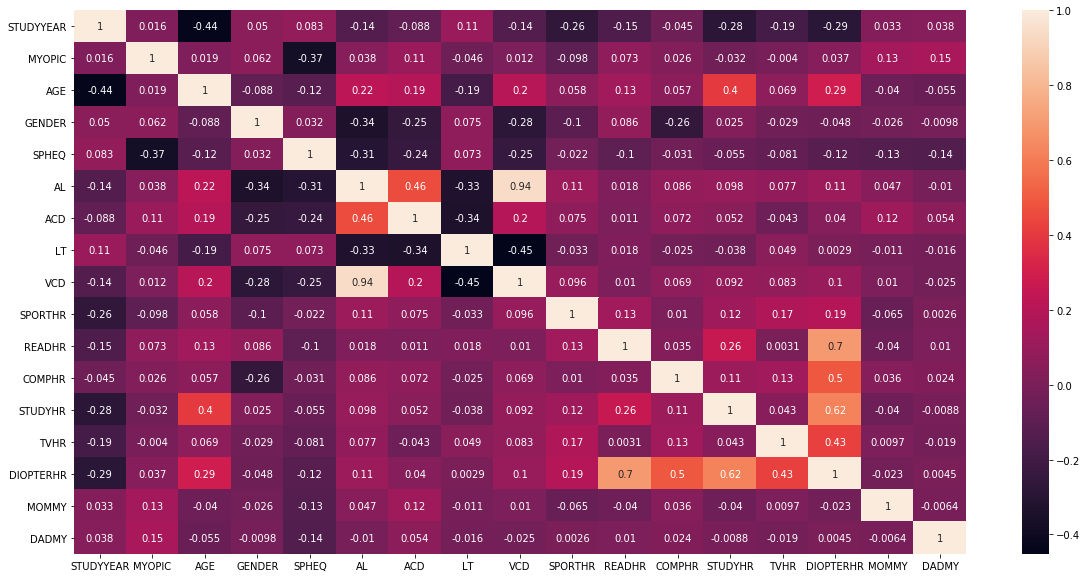

In [72]:
# Obtener matriz de correlación
fig, ax = plt.subplots(figsize=(20,10)) 
heatmap(df_7.corr(), annot = True, ax = ax)

Se observa una serie de variables que muestran una gran correlación como el caso de las variables AL y ACD, o la variable Diopterhir, por lo que se va a eliminar esta última, y también la variable AL, que muestra una correlación mayor con otras variables que la variable ACD. Una vez eliminadas, se volverá a obtener la matriz de correlación de variables.

In [73]:
# Eliminar variables
df_7.drop(['AL', 'DIOPTERHR'], axis = 1, inplace = True)

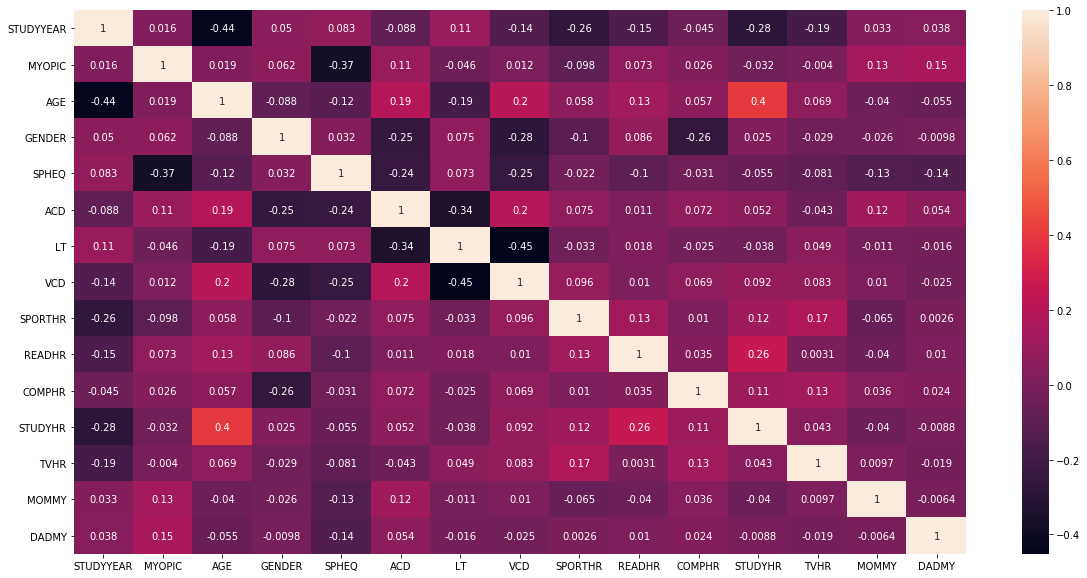

In [74]:
# Obtener nuevamente la matriz de correlación 
fig, ax = plt.subplots(figsize=(20,10)) 
heatmap(df_7.corr(), annot = True, ax = ax)

No existe ninguna variable que presente una correlación alta con otra variable independiente, siendo la mayor correlación de  -0.45, que se considera moderada y no se decide eliminarla del modelo. También se puede observar que no hay ninguna variable que presente una correlación considerable con la variable a predecir, MYOPIC, siendo la única variable que presenta una correlación superior a 0.2 la variable SPHEQ, por lo que se puede pensar que la predicción de la variable dependiente con los datos de los que se dispone puede ser una tarea compleja, aunque ahora se demostrará.

In [75]:
df_7.head(5)

,STUDYYEAR,MYOPIC,AGE,GENDER,SPHEQ,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,MOMMY,DADMY
ID,,,,,,,,,,,,,,,
1,1992,1,6,1,-0.052,3.690,3.498,14.70,45,8,0,0,10,1,1
2,1995,0,6,1,0.608,3.702,3.392,15.29,4,0,1,1,7,1,1
3,1991,0,6,1,1.179,3.462,3.514,15.52,14,0,2,0,10,0,0
4,1990,1,6,1,0.525,3.862,3.612,14.73,18,11,0,0,4,0,1
5,1995,0,5,0,0.697,3.676,3.454,16.16,14,0,0,0,4,1,0


Una vez se ha analizado la colinealidad de las variables, y puesto que no se decide normalizar los datos ya que no es necesario para un modelo de regresión logística, se puede continuar.

En el enunciado se menciona también que se eliminen las variables no significativas. Para ello se podría llevar a cabo, por ejemplo, un análisis de la varianza, de forma que las variables cuya varianza sea baja, significará que no varían mucho y, por lo tanto, que no afectan mucho al modelo. 

Sin embargo, se ha optado por dejar todas las variables, y hacer uso de la función SelectKBest, que escoge las k mejores variables. Por lo tanto, se va a generar una pipeline con la función SelecKBest y con el modelo de Regresión Logística, y se incluirá el parámetro k en el gridsearch de forma que se pueda escoger desde 1 hasta todas las variables, para así generar el modelo con las variables significativas necesarias para maximizar el scoring, que en este caso será el valor por defecto de la función grid search.

In [76]:
# Obtener conjuntos de entrenamiento y test
y_7 = df_7['MYOPIC'].values
X_7 = df_7.drop('MYOPIC', axis = 1).values

X_train_7, X_test_7, y_train_7, y_test_7 = train_test_split(X_7, y_7, test_size = 0.35)

In [77]:
# Generar la pipeline con la regresión logística y el KBest
pipeline = Pipeline([('kbest', SelectKBest(f_classif)), ('lr', LogisticRegression(random_state=seed))]) 

# Generar el grid search
grid_search = GridSearchCV(pipeline, 
                           param_grid = {'kbest__k': np.arange(1,15), 
                                         'lr__C': np.arange(0.5, 10, 0.5)},
                           cv = 10)
grid_search.fit(X_train_7, y_train_7)

GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('kbest',
                                        SelectKBest(k=10,
                                                    score_func=<function f_classif at 0x7f98d4920b00>)),
                                       ('lr',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100,
                                                           multi_class='auto',
                                                           n

In [78]:
parametros = grid_search.best_params_

print("""El modelo final se calcula con un conjunto de datos que contiene {} variables significativas, y el parámetro
C de la regresión logística es igual a {}.""".format(parametros['kbest__k'], parametros['lr__C']))

El modelo final se calcula con un conjunto de datos que contiene 11 variables significativas, y el parámetro
C de la regresión logística es igual a 1.0.


Para evaluar el modelo final se calculan las métricas tanto para la parte de entrenameinto como de test:

In [79]:
rows_7 = ['Training', 'Test']
columns_7 = ['Precisión', 'Exactitud', 'Exhaustividad']

y_pred_test_7 = grid_search.predict(X_test_7)
y_pred_train_7 = grid_search.predict(X_train_7)


array_metrics_7 = np.array([[accuracy_score(y_train_7,y_pred_train_7), precision_score(y_train_7,y_pred_train_7), 
                          recall_score(y_train_7,y_pred_train_7)],
                           [accuracy_score(y_test_7,y_pred_test_7), precision_score(y_test_7,y_pred_test_7), 
                          recall_score(y_test_7,y_pred_test_7)]])

df_metrics_7 = pd.DataFrame(data=array_metrics_7, index=rows_7, columns=columns_7)
df_metrics_7

,Precisión,Exactitud,Exhaustividad
Training,0.905237,0.807692,0.388889
Test,0.880184,0.538462,0.259259


Para aportar más información a las métricas ya generadas, se va a calcular la matriz de confusión para la parte de test.

In [80]:
rows_7 = ['Pred Negative', 'Pred Positive']
columns_7 = ['Actual Negative', 'Actual Positive']
data_7 = confusion_matrix(y_test_7,y_pred_test_7)

pd.DataFrame(data = data_7, columns = columns_7, index = rows_7)

,Actual Negative,Actual Positive
Pred Negative,184,6
Pred Positive,20,7


La matriz de confusión nos ayuda a entender los resultados expuestos en la tabla anterior que recogía las métricas de precisión, exactitud y exhaustividad de la siguiente forma:

* La precisión es alta porque hay un gran número de valores negativoa que se han clasificado correctamente, y al ser esta la clase mayoritaria, la métrica tiene un valor alto.

* La exactitud ya demuestra que hay algún problema, ya que no es un valor alto, ya que de los 18 valores positivos que hay, solo clasifica correctamente 11.

* En la exhaustividad es donde se ve el principal problema de forma que la mayoría de las predicciones positivas no lo eran, por lo que demuestra un bajo acierto en la predicción positiva.


Por lo tanto, se observa que la mayoría de las predicciones realizadas han sido correctas ya que la gran mayoría de los valores eran negativos, pero la exactitud y la exhaustividad demuestran que el modelo no tiene capacidad predictora ya que no es capaz de predecir con exactitud los valores positivos. Esto se puede deber a:

* La baja correlación entre las variables independientes y la dependiente de forma que no se encuentran patrones para poder predecir el valor de la miopía en base a las variables aportadas.

* El desbalanceamiento que se aprecia en la variable dependiente, ya que más de un 85% de los datos pertenecen a la clase de no miopía, por lo que los registros con miopía positiva son muy escasos, y el modelo no es capaz de predecir correctamente. Para este problema, se podría intentar balancear el conjunto de datos eliminando valores de la clase 0, lo cual sería perjudicial porque no hay muchos registros, generando valores de la clase 1 a partir de los datos que ya se tienen, pero se crearía registros artificiales, que tampoco es recomendable para un estudio, o buscar más datos, que sería lo óptimo, ya qu eobteniendo más registros, incluso aunque se mantuvieran las clases desbalanceadas, podría haber suficientes registros con miopía positiva para que el modelo pudiera encontrar patrones que mejoraran la capacidad predictora del mismo.

Se podrían haber llevado a cabo otras técnicas como normalizar los datos, o hace un VIF previo para seleccionar las características, pero debido a que se entiende que los problemas se encuentran en el dataset, por el escaso número de registros y lo desbalanceada que se encuentra la clase a predecir, se entiende que no mejorarían mucho los resultados, y las conclusiones finales serían las mismas.